<a href="https://colab.research.google.com/github/gyuholee94/NLP/blob/master/Appendix_D_Linear_Algebra%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8(8%EC%9B%94%EC%A0%95%EB%A6%AC%26%EB%8B%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2 주성분 분석(PCA, Principal Component Analysis)

* PCA는 데이터의 분산(variance)을 최대로 하는 축을 찾는 것을 반복하여, 고차원 공간의 표본들을 저차원 공간으로 변환하는 기법




![대체 텍스트](http://i.imgur.com/jWJ2nUs.png)

## 2.1 차원 축소의 예

변수 갯수를 차원이라고 생각할 수 있음

In [ ]:
국어 = 80
영어 = 60
수학 = 90
과학 = 70

평균 = (국어 + 영어 + 수학 + 과학)/4
평균

75.0

In [ ]:
몸무게 = 70
키 = 180


BMI = 몸무게 / (키 * 키)
BMI

0.0021604938271604936



---



## 2.2 PCA 예제 1

### 1) 예제 데이터

In [ ]:
import pandas as pd
# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat


### 2) vector 추출

In [ ]:
# X is feature vectors
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
X.head()

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0


In [ ]:
# Y is labels
Y = df[['body_shape']]
Y.head()

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat


### 3) feature vector 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler
x_std= StandardScaler().fit_transform(X)
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [ ]:
print(x_std.mean())
print(x_std.std())

3.552713678800501e-17
1.0


In [ ]:
x_std.T

array([[-1.35205803,  0.01711466,  0.61612771, -1.18091145,  1.89972711,
        -1.26648474,  0.18826125,  1.04399418, -0.15403193,  0.18826125],
       [ 0.        ,  0.        ,  1.29099445, -1.29099445,  1.29099445,
        -1.29099445,  0.        ,  1.29099445, -1.29099445,  0.        ],
       [-1.3764944 , -0.22941573,  0.91766294, -0.22941573,  0.91766294,
        -1.3764944 , -1.3764944 ,  0.91766294,  0.91766294,  0.91766294],
       [-1.28571429,  0.14285714,  0.14285714, -1.28571429,  1.57142857,
         0.14285714,  0.14285714,  1.57142857, -1.28571429,  0.14285714],
       [ 1.        ,  0.        , -1.        ,  2.        , -1.        ,
         1.        ,  0.        , -1.        , -1.        ,  0.        ]])

### 4) feature 간 공분산 행렬계산

In [ ]:
import numpy as np
features = x_std.T
covariance_matrix = np.cov(features)

covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [ ]:
x_std.T.dot(x_std)

array([[10.        ,  7.95417455,  6.91041467,  8.04388957, -8.38618274],
       [ 7.95417455, 10.        ,  4.44261658,  7.37711114, -6.45497224],
       [ 6.91041467,  4.44261658, 10.        ,  3.60510439, -6.88247202],
       [ 8.04388957,  7.37711114,  3.60510439, 10.        , -5.71428571],
       [-8.38618274, -6.45497224, -6.88247202, -5.71428571, 10.        ]])

### 5) 고유 벡터(Eigen Vectors)와 고유값(Eigen Values) 산출

In [ ]:
eig_vals, eig_vecs =  np.linalg.eig(covariance_matrix)
print("eigen values : ", eig_vals)
print("eigen vectors : ", eig_vecs)

eigen values :  [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]
eigen vectors :  [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [ ]:
eig_vals[0]/sum(eig_vals)

0.7318321731427544

### 6) 고유벡터(Eigen Vector)를 기준으로 데이터를 투영

In [ ]:
projected_X = x_std.dot(eng_vecs.T[0])
projected_X

array([ 2.22600943,  0.0181432 , -1.76296611,  2.73542407, -3.02711544,
        2.14702579,  0.37142473, -2.59239883,  0.39347815, -0.50902498])

In [ ]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y
result 

,PC1,y-axis,label
0,2.226009,0.0,Skinny
1,0.018143,0.0,Normal
2,-1.762966,0.0,Fat
3,2.735424,0.0,Skinny
4,-3.027115,0.0,Fat
5,2.147026,0.0,Skinny
6,0.371425,0.0,Normal
7,-2.592399,0.0,Fat
8,0.393478,0.0,Normal
9,-0.509025,0.0,Fat


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'PCA result')

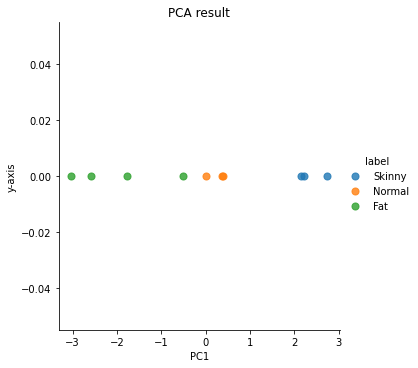

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False, 
           scatter_kws={"s": 50},
           hue="label")
plt.title('PCA result')



---



## 2.3 scikit-learn 활용 PCA

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_pca_x

array([[-2.22600943, -0.54936514],
       [-0.0181432 , -0.23871898],
       [ 1.76296611,  0.36868681],
       [-2.73542407,  0.4544983 ],
       [ 3.02711544, -0.41305057],
       [-2.14702579, -0.83449111],
       [-0.37142473, -1.05380594],
       [ 2.59239883, -0.3985085 ],
       [-0.39347815,  2.09420397],
       [ 0.50902498,  0.57055116]])



---



Text(0.5, 1.0, 'PCA result')

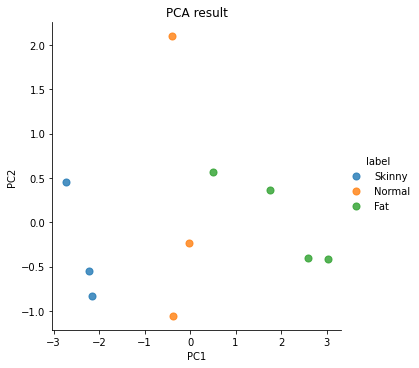

In [ ]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1', 'PC2'])
sklearn_result['label'] = Y

sns.lmplot('PC1', 'PC2', data=sklearn_result, fit_reg=False, 
           scatter_kws={"s": 50},
           hue="label")
plt.title('PCA result')

# 2 특이값 분해(SVD, Singular Value Decomposion)

![대체 텍스트](https://wikimedia.org/api/rest_v1/media/math/render/svg/2ab6bd797a2b7652b0a54894bb3825756e8f9c6c)

In [ ]:
A = np.array([[1, 0, 0, 0, 2],
              [0, 0, 3, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 2, 0, 0, 0]])

## 2.1 특이값 분해

![대체 텍스트](https://wikimedia.org/api/rest_v1/media/math/render/svg/8d164e57dfbf6318e5cdc21a1c24fcc6c3cea0c4)

In [ ]:
import numpy as np

U, s, VT = np.linalg.svd(A)

print('U:\n {}'.format(U))
print('s:\n {}'.format(s))
print('VT:\n {}'.format(VT))


U:
 [[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
s:
 [3.         2.23606798 2.         0.        ]
VT:
 [[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.         -0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


In [ ]:
import numpy as np

a = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])


U, s, VT = np.linalg.svd(a)

print('U:\n {}'.format(U))
print('s:\n {}'.format(s))
print('VT:\n {}'.format(VT))


U:
 [[-1.37599126e-01 -2.36114514e-02 -1.08084718e-02  5.60112034e-01
  -3.75734575e-01 -7.00140042e-01 -1.87867287e-01]
 [-4.12797378e-01 -7.08343543e-02 -3.24254153e-02  2.06393278e-01
   7.55974371e-01 -2.57991597e-01  3.77987186e-01]
 [-5.50396503e-01 -9.44458057e-02 -4.32338870e-02 -7.24808963e-01
  -1.84603760e-01 -3.43988797e-01 -9.23018799e-02]
 [-6.87995629e-01 -1.18057257e-01 -5.40423588e-02  3.43988797e-01
  -2.30754700e-01  5.70014004e-01 -1.15377350e-01]
 [-1.52775087e-01  5.91100963e-01  6.53650843e-01  2.58497890e-16
   2.00000000e-01  0.00000000e+00 -4.00000000e-01]
 [-7.22165140e-02  7.31311857e-01 -6.78209218e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.63875433e-02  2.95550482e-01  3.26825421e-01  1.29248945e-16
  -4.00000000e-01  0.00000000e+00  8.00000000e-01]]
s:
 [1.24810147e+01 9.50861406e+00 1.34555971e+00 3.04642685e-16
 0.00000000e+00]
VT:
 [[-5.62258405e-01 -5.92859901e-01 -5.62258405e-01 -9.01335372e-02
  -9.01335372e-02]
 [-1

## 2.2 이미지에 적용한 특이값 분해

Size(dimension):  (684, 891)


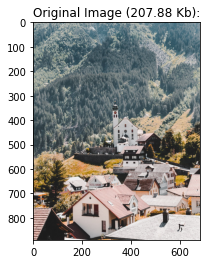

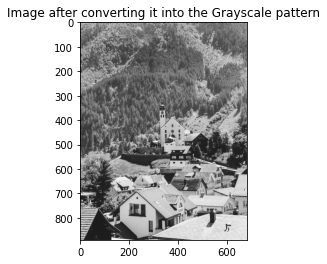

After compression: 


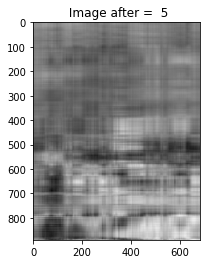

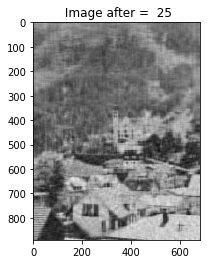

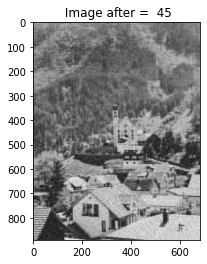

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

path = '/content/drive/My Drive/강의 /sample.jpg'

#이미지 파일 열기
img = Image.open(path)

#파일 크기 계산
s = float(os.path.getsize(path))/1000
print("Size(dimension): ",img.size)
plt.title("Original Image (%0.2f Kb):" %s)
plt.imshow(img)

# gray 스케일로 변환
imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)

# 이미지 크기(가로, 세로)로 reshape
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after converting it into the Grayscale pattern")
plt.show()

print("After compression: ")
U, S, Vt = np.linalg.svd(imgmat) #single value decomposition

# 5, 25, 45 개의 특이값을 적용하여 이미지 압축
for i in range(5, 51, 20):
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
    plt.imshow(cmpimg, cmap = 'gray')
    title = " Image after =  %s" %i
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg ).astype(np.uint8))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
